In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.table import Table
from astropy.table import join

mpl.rcParams["figure.dpi"] = 100

df = pd.read_parquet('./data.parquet')
df.head()

,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,...,bf18_e_[Na/N],bf18_[Na/C],bf18_e_[Na/C],bf18_[O/N],bf18_e_[O/N],bf18_[O/C],bf18_e_[O/C],bf18_[N/C],bf18_e_[N/C],bf18_[alpha/Fe]
0,10797460,K00752.01,Kepler-227 b,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
1,10797460,K00752.02,Kepler-227 c,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
2,10811496,K00753.01,None,297.00482,0.0,19h48m01.16s,48.134129,0.0,+48d08m02.9s,15.943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10848459,K00754.01,None,285.53461,0.0,19h02m08.31s,48.285210,0.0,+48d17m06.8s,16.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10854555,K00755.01,Kepler-664 b,288.75488,0.0,19h15m01.17s,48.226200,0.0,+48d13m34.3s,16.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Compute abundances normalized to Mg

#Abundances normalized to Fe
bf18_elements = ['C', 'N', 'O', 'Na', 'Al', 'Si', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Y']
for el in bf18_elements:
    el_str = "bf18_["+el+"/H]"
    el_err_str = "bf18_e_["+el+"/H]"
    
    df["bf18_["+el+"/Mg]"] = df[el_str] - df["bf18_[Mg/H]"]
    df["bf18_e_["+el+"/Mg]"] = np.sqrt(df[el_err_str]**2 + df["bf18_e_[Mg/H]"]**2)


In [2]:
# The dataframe has a row entry for each KOI, meaning individual star are represented N times
# where N is the number of KOIs detected around that star so we drop duplicates.
print(np.shape(df))
df = df.drop_duplicates(subset=['kepid'], keep='first')
print(np.shape(df))

(9750, 1371)
(8214, 1371)


### Nissen et al. 2020 solar twin sample

In [4]:
nis_t1 = Table.read("http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/table1.dat",
                readme="http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/ReadMe",
                format="ascii.cds")

nis_t2 = Table.read("http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/table2.dat",
                readme="http://cdsarc.unistra.fr/ftp/J/A+A/640/A81/ReadMe",
                format="ascii.cds")

nis = join(nis_t1,nis_t2)

nis['ymg_ratio'] = nis['[Y/Fe]'] - nis['[Mg/Fe]']
nis['yal_ratio'] = nis['[Y/Fe]'] - nis['[Al/Fe]']

nis = nis.to_pandas()
nis = nis.replace(9.999, np.nan)

nis.head()

,HD,Teff,logg-sp,Vturb,[Fe/H],[alpha/Fe],Zs,logL,Age,e_Age,...,[Al/Fe],[Si/Fe],[Ca/Fe],[Ti/Fe],[Cr/Fe],[Ni/Fe],[Sr/Fe],[Y/Fe],ymg_ratio,yal_ratio
0,361,5892,4.524,1.05,-0.130,-0.003,0.0135,-0.021,1.5,0.9,...,-0.042,-0.013,0.027,0.019,0.002,-0.056,0.106,0.079,0.093,0.121
1,1461,5760,4.372,1.03,0.190,0.009,0.0275,0.077,5.5,0.5,...,0.044,0.014,-0.016,0.007,0.005,0.045,-0.052,-0.039,-0.046,-0.083
2,2071,5724,4.486,0.96,-0.087,0.013,0.0152,-0.076,4.1,0.9,...,-0.001,0.002,0.024,0.029,0.005,-0.029,0.032,0.039,0.038,0.040
3,4915,5662,4.513,0.93,-0.212,0.042,0.0121,-0.154,3.8,1.3,...,0.020,0.014,0.045,0.064,0.006,-0.037,0.036,0.032,-0.016,0.012
4,6204,5857,4.517,1.05,0.046,-0.038,0.0188,-0.034,-0.4,1.0,...,-0.078,-0.044,0.019,-0.009,0.005,-0.064,0.129,0.122,0.184,0.200


In [5]:
#for col in nis.columns:
#    print(col)

HD
Teff
logg-sp
Vturb
[Fe/H]
[alpha/Fe]
Zs
logL
Age
e_Age
Mass
logg-ph
Ys
[C/Fe]
[O/Fe]
[Na/Fe]
[Mg/Fe]
[Al/Fe]
[Si/Fe]
[Ca/Fe]
[Ti/Fe]
[Cr/Fe]
[Ni/Fe]
[Sr/Fe]
[Y/Fe]
ymg_ratio
yal_ratio


In [47]:
regression_cols = []
#regression_cols.append("bf18_Teff")
#regression_cols.append("bf18_log(g)")

for col in df.columns:
    if ("bf18_[" in col) & ("/Mg]" in col) & (col!="bf18_[M/H]") & (col!="bf18_[alpha/Fe]"):
        regression_cols.append(col)
    if ("bf18_e_[" in col) & ("/Fe]" in col) & (col!="bf18_e_[alpha/Fe]"):
        regression_cols.append(col)        
        

regression_cols.append("bf18_[Fe/H]")
regression_cols.append("bf18_e_[Fe/H]")
regression_cols.append("cks_age")
regression_cols.append("cks_age_maxerr")

regression_cols = np.array(regression_cols)
#regressor_labels = [s.split("bf18_")[1] for s in regression_cols]
#regressor_labels = np.array(regressor_labels)
#regressor_labels
regression_cols

array(['bf18_e_[C/Fe]', 'bf18_e_[N/Fe]', 'bf18_e_[O/Fe]',
       'bf18_e_[Na/Fe]', 'bf18_e_[Mg/Fe]', 'bf18_e_[Al/Fe]',
       'bf18_e_[Si/Fe]', 'bf18_e_[Ca/Fe]', 'bf18_e_[Ti/Fe]',
       'bf18_e_[V/Fe]', 'bf18_e_[Cr/Fe]', 'bf18_e_[Mn/Fe]',
       'bf18_e_[Ni/Fe]', 'bf18_e_[Y/Fe]', 'bf18_[Y/Mg]', 'bf18_[Ni/Mg]',
       'bf18_[Mn/Mg]', 'bf18_[Cr/Mg]', 'bf18_[V/Mg]', 'bf18_[Ti/Mg]',
       'bf18_[Ca/Mg]', 'bf18_[Si/Mg]', 'bf18_[Al/Mg]', 'bf18_[C/Mg]',
       'bf18_[N/Mg]', 'bf18_[O/Mg]', 'bf18_[Na/Mg]', 'bf18_[Fe/Mg]',
       'bf18_[Fe/H]', 'bf18_e_[Fe/H]', 'cks_age', 'cks_age_maxerr'],
      dtype='<U14')

In [49]:
data = df[regression_cols]
data = data.dropna(axis='rows')
data.head()

,bf18_e_[C/Fe],bf18_e_[N/Fe],bf18_e_[O/Fe],bf18_e_[Na/Fe],bf18_e_[Mg/Fe],bf18_e_[Al/Fe],bf18_e_[Si/Fe],bf18_e_[Ca/Fe],bf18_e_[Ti/Fe],bf18_e_[V/Fe],...,bf18_[Al/Mg],bf18_[C/Mg],bf18_[N/Mg],bf18_[O/Mg],bf18_[Na/Mg],bf18_[Fe/Mg],bf18_[Fe/H],bf18_e_[Fe/H],cks_age,cks_age_maxerr
0,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,...,-0.02,-0.03,-0.05,0.05,-0.07,0.00,0.03,0.02,3.981072,2.779758
5,0.042426,0.042426,0.042426,0.042426,0.042426,0.042426,0.042426,0.042426,0.042426,0.042426,...,0.05,0.01,-0.31,0.02,-0.06,0.05,0.12,0.03,6.760830,2.395671
9,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,...,-0.03,0.36,-0.40,0.52,0.01,0.08,0.04,0.02,2.041738,3.453671
10,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,0.028284,...,-0.08,0.04,0.09,0.01,-0.07,0.03,-0.01,0.02,5.495409,1.917694
11,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,...,0.03,-0.09,0.19,0.25,-0.08,0.14,0.24,0.01,1.778279,0.193386


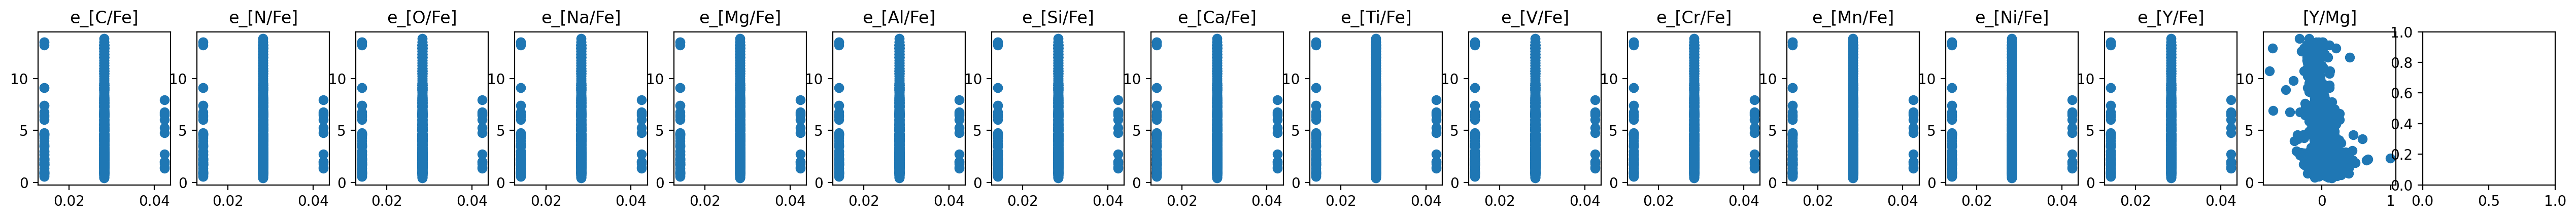

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=16, figsize=(32,2))

for i,col in enumerate(data.columns):
    if i<15:
        ax[i].scatter(data[col], data["cks_age"])
        ax[i].set_title(col.split("bf18_")[1])
    
    
plt.show()
    
# #     if '_e_' in col:
# #         pass
#     else:
#         ax[i]

Adjusted R-squared: 0.567192308609379
Feature: 0, Score: -18.74916
Feature: 1, Score: -9.89240
Feature: 2, Score: -6.04765
Feature: 3, Score: -2.31454
Feature: 4, Score: -1.08367
Feature: 5, Score: -0.31887
Feature: 6, Score: 0.23307
Feature: 7, Score: 0.58760
Feature: 8, Score: 0.78426
Feature: 9, Score: 0.94282
Feature: 10, Score: 2.25067
Feature: 11, Score: 3.05476
Feature: 12, Score: 3.24844
Feature: 13, Score: 3.40676
Feature: 14, Score: 9.37501


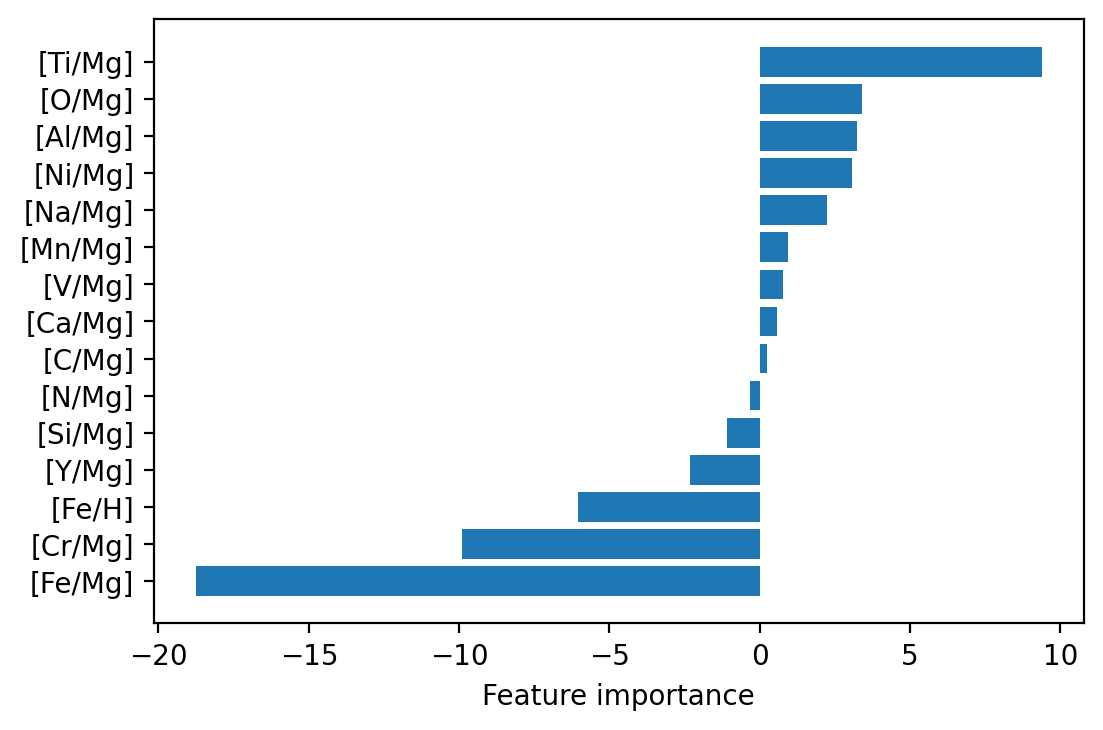

In [51]:
from sklearn.linear_model import LinearRegression

regression_cols = []
#regression_cols.append("bf18_Teff")
#regression_cols.append("bf18_log(g)")

df = df[df['bf18_Age'].notna()]
df = df[df['cks_age'].notna()]


for col in df.columns:
    if ("bf18_[" in col) & ("/Mg]" in col) & (col!="bf18_[M/H]"):
        regression_cols.append(col)

        
regression_cols.append("bf18_[Fe/H]")
regression_cols = np.array(regression_cols)
regressor_labels = [s.split("bf18_")[1] for s in regression_cols]
regressor_labels = np.array(regressor_labels)

#There are some pretty significant outliers which screw up the regression. Let's remove those.
for col in regression_cols:
    df = df[abs(df[col])<3]

model = LinearRegression()
X, y = df[regression_cols], df.cks_age
model.fit(X, y)

#Adjusted R-squared
print('Adjusted R-squared:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

# Get importance
importance = model.coef_

order = np.argsort(importance)
importance = importance[order]
regressor_labels = regressor_labels[order]

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(np.arange(len(importance)), regressor_labels)
plt.xlabel("Feature importance")
plt.show()

In [10]:
#2021-09-10 Hogg
#How well does age predict each different abundance ?
#Information theory: age from a proxy, maximize some information theory metric

#you also wouldnt use the input abundances as features becasue they're noisy. latent surface that explains all of the data
#every measuremnt you have is some noisy approximation of the truth..so you wouldnt do linear regression to predict isochrone ages. youd fit linear model that explains all of the data symmetrically
#relationships between abundance and age
#radial migration...

#Two variables that are correlated. both measured noisily. How you fit a line depends on the ratios of those errors. We're in that regime.
#Always do fit that age is a fn. of abundance - because it's more easily to deal with noise on the dependent variable. If errors are very asymmetric, it's obvious how to do the problem.
#As soon as errors become comparable. 

#Does raw data that delivered the ages show breaks at 10 Gyr. Plot deviation from 10 Gyr isochrone.

#Make a model that is strictly linear with abundances. Try to make the schmage have minimum scatter relative to the published ages.
#Only ask the published ages to be correct in their ordering of the stars. Here's a linear combination of abundances that is monotonically related to ages. 
#And here's a subset. If you think so and so ages are correct, apply this non-linear correction and you'll get ages on that scale.

#Whats the simplest abundance combination that is basically age.
#Schmages will be way more precise.

#Basic linear regression as an initialization. Do individual 15 abundances to translate age. 16d surface. An initialization for the problem.
#Then ask how flexible do we want to be the schmage connect to age. Look at old school rank statistics. 
#start at initial condition Optimize a rank statistic.
#Plot age vs. schmage colored by relative abundance ratios. Gradients across the age-schmage relation would help make teh relation better. 
#Produce a slightly better model that describes that curve as well. 
#Create a generative model that generates everything and fit that model. 
#With a generative model you could include any data that you like. 
#You just compare it to the model where you happen to have the observations.
#Structure the generative model such that age is a latent parameter and you only generate abundances. Pull age through and abundances get generated.

#Everything to H or something well measured, or everything to Fe
#Mg/H and everything to Mg
#Objective function that isn't just a rank statistic. Something that stops it from blowing up. Something like also asking the mean age to remain the same.
#Or more specific: the range of ages and the scatter of ages is the same. (difference in means squared and difference in variances squared)

In [55]:
import pymc3 as pm
import pymc3_ext as pmx
import aesara_theano_fallback.tensor as tt
import exoplanet as xo

with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    
    t0        = pm.Normal("t0", 0, sigma=100, testval=0)
    C_coeff   = pm.Normal("C_coeff", 0, sigma=100, testval=0)
    N_coeff   = pm.Normal("N_coeff", 0, sigma=100, testval=0)
    O_coeff   = pm.Normal("O_coeff", 0, sigma=100, testval=0)
    Na_coeff  = pm.Normal("Na_coeff", 0, sigma=100, testval=0)
    Al_coeff  = pm.Normal("Al_coeff", 0, sigma=100, testval=0)
    Si_coeff  = pm.Normal("Si_coeff", 0, sigma=100, testval=0)
    Ca_coeff  = pm.Normal("Ca_coeff", 0, sigma=100, testval=0)
    Ti_coeff  = pm.Normal("Ti_coeff", 0, sigma=100, testval=0)
    V_coeff   = pm.Normal("V_coeff", 0, sigma=100, testval=0)
    Cr_coeff  = pm.Normal("Cr_coeff", 0, sigma=100, testval=0)
    Mn_coeff  = pm.Normal("Mn_coeff", 0, sigma=100, testval=0)
    Fe_coeff  = pm.Normal("Fe_coeff", 0, sigma=100, testval=0)
    Ni_coeff  = pm.Normal("Ni_coeff", 0, sigma=100, testval=0)
    Y_coeff   = pm.Normal("Y_coeff", 0, sigma=100, testval=0)
    FeH_coeff = pm.Normal("FeH_coeff", 0, sigma=100, testval=0)
    
    #true_ages  = pm.Normal("true_ages", mu=data["cks_age"], sigma=data["cks_age_maxerr"], shape=len(data))
    
    schmages  = t0 +\
                C_coeff*data["bf18_[C/Mg]"]+\
                N_coeff*data["bf18_[N/Mg]"]+\
                O_coeff*data["bf18_[O/Mg]"]+\
                Na_coeff*data["bf18_[Na/Mg]"]+\
                Al_coeff*data["bf18_[Al/Mg]"]+\
                Si_coeff*data["bf18_[Si/Mg]"]+\
                Ca_coeff*data["bf18_[Ca/Mg]"]+\
                Ti_coeff*data["bf18_[Ti/Mg]"]+\
                V_coeff*data["bf18_[V/Mg]"]+\
                Cr_coeff*data["bf18_[Cr/Mg]"]+\
                Mn_coeff*data["bf18_[Mn/Mg]"]+\
                Fe_coeff*data["bf18_[Fe/Mg]"]+\
                Ni_coeff*data["bf18_[Ni/Mg]"]+\
                Y_coeff*data["bf18_[Y/Mg]"]+\
                FeH_coeff*data["bf18_[Fe/H]"]
    
    schmage_sigmas = pm.HalfCauchy("schmage_sigmas", beta=10, testval=1.0, shape=len(data))
    #sigma = pm.Deterministic("sigma", ((sigma_jit**2 + data["e_ymg"]**2))**0.5 )
    
    # Define likelihood
    likelihood = pm.Normal("likelihood", 
                           mu=schmages, 
                           sigma=schmage_sigmas, 
                           observed=data["cks_age"]) #observed=data["y"] + yoffset)
    
    
    
    pm.Potential("mean", -0.5*(tt.mean(true_ages) - tt.mean(schmages))**2)
    pm.Potential("variance", -0.5*(tt.var(true_ages) - tt.var(schmages))**2)

    #if start is None:
    start = model.test_point     
    #map_soln = pmx.optimize(start=start, vars=[theta1, theta3, theta4])
    map_soln = pmx.optimize(start=start)
    map_soln = pmx.optimize(start=map_soln)

MissingInputError: Input 0 of the graph (indices start from 0), used to compute Shape(true_ages), was not provided and not given a value. Use the Theano flag exception_verbosity='high', for more information on this error.